In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [52]:
df=pd.read_csv("data3.csv")
df=df.drop('city', axis='columns')
df=df.drop('view', axis='columns')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,313000.0,3,1.50,1340,7912,1.5,3
1,2384000.0,5,2.50,3650,9050,2.0,5
2,342000.0,3,2.00,1930,11947,1.0,4
3,420000.0,3,2.25,2000,8030,1.0,4
4,550000.0,4,2.50,1940,10500,1.0,4


In [53]:
import math
df.bedrooms=df.bedrooms.fillna(math.floor(df.bedrooms.median()))
df.bathrooms=df.bathrooms.fillna(df.bathrooms.median())
df.sqft_living=df.sqft_living.fillna(math.floor(df.sqft_living.median()))
df.sqft_lot=df.sqft_lot.fillna(math.floor(df.sqft_lot.median()))
df.floors=df.floors.fillna(math.floor(df.floors.median()))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,313000.0,3,1.50,1340,7912,1.5,3
1,2384000.0,5,2.50,3650,9050,2.0,5
2,342000.0,3,2.00,1930,11947,1.0,4
3,420000.0,3,2.25,2000,8030,1.0,4
4,550000.0,4,2.50,1940,10500,1.0,4


In [54]:
reg=linear_model.LinearRegression()

In [55]:
inputs=df.drop('price', axis='columns')
target=df['price']


In [56]:
inputs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,3,1.50,1340,7912,1.5,3
1,5,2.50,3650,9050,2.0,5
2,3,2.00,1930,11947,1.0,4
3,3,2.25,2000,8030,1.0,4
4,4,2.50,1940,10500,1.0,4


In [57]:
target.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [58]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import array as arr
scores=[]
i=0
t=[0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for s in t:
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=s, random_state=100)
    reg.fit(inputs_train, target_train)
    prediction=reg.predict(inputs_test)
    #accuracy using train test split
    # predicting the accuracy score
    score=r2_score(target_test,prediction)
    print("r2 socre is ",score)
    print("mean_sqrd_error is==",mean_squared_error(target_test,prediction))
    print("root_mean_squared error of is==",np.sqrt(mean_squared_error(target_test,prediction)))
    #print("Coefficient:",reg.coef_)
    #print("Intercept:",reg.intercept_)
    scores.append(score)

r2 socre is  0.47532663335426495
mean_sqrd_error is== 75024939127.34819
root_mean_squared error of is== 273906.8073767941
r2 socre is  0.4779360615839884
mean_sqrd_error is== 70919560383.86896
root_mean_squared error of is== 266307.2668626768
r2 socre is  0.30877754708724636
mean_sqrd_error is== 161630429876.72574
root_mean_squared error of is== 402032.87163704133
r2 socre is  0.12878537349231178
mean_sqrd_error is== 444547479787.75073
root_mean_squared error of is== 666743.9386959214
r2 socre is  0.14496129054423512
mean_sqrd_error is== 381623421167.5547
root_mean_squared error of is== 617756.7653757866
r2 socre is  0.15532010933859375
mean_sqrd_error is== 334867183052.6838
root_mean_squared error of is== 578677.097397749
r2 socre is  0.16439204628485493
mean_sqrd_error is== 304443256518.9822
root_mean_squared error of is== 551763.768762486


In [59]:
scores

[0.47532663335426495,
 0.4779360615839884,
 0.30877754708724636,
 0.12878537349231178,
 0.14496129054423512,
 0.15532010933859375,
 0.16439204628485493]

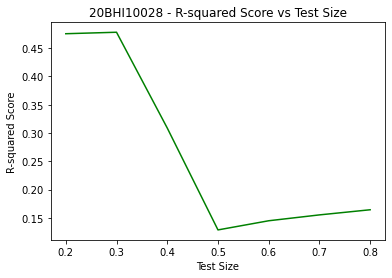

In [60]:
import matplotlib.pyplot as plt
plt.plot(t, scores, color="green")
plt.xlabel("Test Size")
plt.ylabel("R-squared Score")
plt.title("20BHI10028 - R-squared Score vs Test Size")
plt.show()